In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

seed = 7
np.random.seed(seed)

data1 = pd.read_excel('/content/drive/MyDrive/Major Project/New/mangalath-failure modes/Shear-Wall-Failure-Mode-master/Shear_Wall_Database.xlsx', sheet_name='Database')
data1.head()

,Unnamed: 0,Author,Specimen,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,Lefas et al. (1990a),SW11,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,2,Lefas et al. (1990a),SW12,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,3,Lefas et al. (1990a),SW13,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,4,Lefas et al. (1990a),SW14,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,5,Lefas et al. (1990a),SW15,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [123]:
data=data1.loc[:, 'FailureMode':'Ab/Ag']
data.head()


,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,R,0.0
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,R,0.0
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,R,0.0
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,R,0.0
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,R,0.0


In [124]:

data_mod_lc = data.copy()
data_mod_lc['Section'] = data_mod_lc['Section'].astype('category')
#print(cat_bird_lc.dtypes)
data_mod_lc['Section'] = data_mod_lc['Section'].cat.codes
data_mod_lc.head(10)


,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.100000,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.100000,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.100000,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.100000,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.100000,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0
5,1,1.100000,10.714286,0.271999,0.138298,0.352273,0.150870,0.211845,2,0.0
6,1,1.100000,10.714286,0.291146,0.049793,0.401398,0.161491,0.000000,2,0.0
7,1,2.115385,10.000000,0.342420,0.121495,0.452979,0.136682,0.000000,2,0.0
8,1,2.115385,10.000000,0.290267,0.102767,0.383152,0.115613,0.106415,2,0.0
9,1,2.115385,10.000000,0.307270,0.108787,0.405596,0.122385,0.212300,2,0.0


In [125]:
data['Section'] = data_mod_lc['Section']
data.head()

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Section,Ab/Ag
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,2,0.0
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,2,0.0
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,2,0.0
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,2,0.0
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,2,0.0


In [126]:

c = data_mod_lc.Section.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

{0: 0, 1: 1, 2: 2}


In [127]:
#checking missing values by column
data.isnull().sum()

FailureMode    0
M/Vlw          0
lw/tw          0
ρvwFy,vw/fc    0
ρhwFy,vw/fc    0
ρvcFy,vc/fc    0
ρhcFy,hc/fc    0
P/fcAg         0
Section        0
Ab/Ag          0
dtype: int64

In [128]:
#One Hot Encoding for the categorical values
data = pd.get_dummies(data = data , columns=['Section'] )
data.head()

,FailureMode,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,Section_0,Section_1,Section_2
0,1,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,0,0,1
1,1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,0,0,1
2,1,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,0,0,1
3,1,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,0,0,1
4,1,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,0,0,1


In [129]:
X = data.loc[:, data.columns != 'FailureMode']
y=data['FailureMode']-1
y.head()

0    0
1    0
2    0
3    0
4    0
Name: FailureMode, dtype: int64

In [130]:
X.head()

,M/Vlw,lw/tw,"ρvwFy,vw/fc","ρhwFy,vw/fc","ρvcFy,vc/fc","ρhcFy,hc/fc",P/fcAg,Ab/Ag,Section_0,Section_1,Section_2
0,1.1,10.714286,0.268879,0.136711,0.348231,0.149140,0.000000,0.0,0,0,1
1,1.1,10.714286,0.262358,0.133396,0.339785,0.145522,0.102168,0.0,0,0,1
2,1.1,10.714286,0.346364,0.176108,0.448584,0.192118,0.208187,0.0,0,0,1
3,1.1,10.714286,0.334023,0.169834,0.432601,0.185273,0.000000,0.0,0,0,1
4,1.1,10.714286,0.324766,0.165127,0.420612,0.180139,0.101727,0.0,0,0,1


In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
X_train.shape

(275, 11)

In [133]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix 


In [134]:
ACCURACY_THRESHOLD = 0.95



In [135]:

ann = models.Sequential([
        layers.Dense(64,input_shape=(11,),activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')    
    ])

ann.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                768       
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 4)                 260       
                                                                 
Total params: 9,348
Trainable params: 9,348
Non-trainable params: 0
_________________________________________________________________


In [136]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=ann.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=60) #,callbacks=[callbacks])

Epoch 1/60
9/9 [==============================] - 1s 29ms/step - loss: 1.3880 - accuracy: 0.2364 - val_loss: 1.3216 - val_accuracy: 0.5000
Epoch 2/60
9/9 [==============================] - 0s 9ms/step - loss: 1.2916 - accuracy: 0.5745 - val_loss: 1.2234 - val_accuracy: 0.6102
Epoch 3/60
9/9 [==============================] - 0s 8ms/step - loss: 1.2125 - accuracy: 0.5709 - val_loss: 1.1233 - val_accuracy: 0.6186
Epoch 4/60
9/9 [==============================] - 0s 9ms/step - loss: 1.1415 - accuracy: 0.5564 - val_loss: 1.0288 - val_accuracy: 0.6186
Epoch 5/60
9/9 [==============================] - 0s 9ms/step - loss: 1.0793 - accuracy: 0.5527 - val_loss: 0.9514 - val_accuracy: 0.6186
Epoch 6/60
9/9 [==============================] - 0s 14ms/step - loss: 1.0331 - accuracy: 0.5782 - val_loss: 0.9009 - val_accuracy: 0.6186
Epoch 7/60
9/9 [==============================] - 0s 11ms/step - loss: 0.9953 - accuracy: 0.5855 - val_loss: 0.8692 - val_accuracy: 0.6186
Epoch 8/60
9/9 [===============

In [137]:
ann.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.8390


[0.5201317667961121, 0.8389830589294434]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


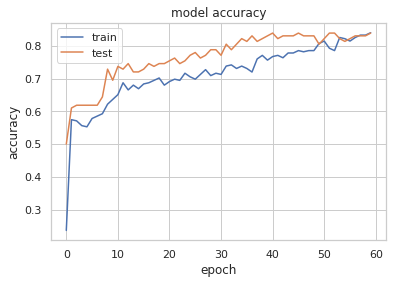

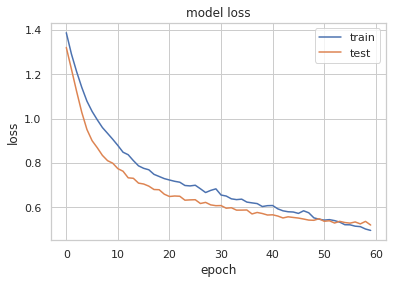

In [138]:
print(history.history.keys())
plt.figure()
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [139]:
prediction=ann.predict(X_test)

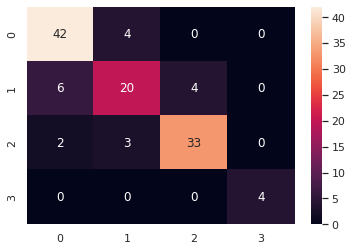

In [140]:
ypred=np.argmax(prediction,axis=1)
cf_matrix=confusion_matrix(y_test, ypred,labels=None, sample_weight=None, normalize=None)
sns.heatmap(cf_matrix, annot=True)

*italicized text*